# Percolation

In [2]:
from RandomLoop import StateSpace
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import json

In [27]:
m = StateSpace(3, 64, 4)
m.step(1_000_000)
m.step(1_000_000, sample_rate=1_000, observables=[m.check_percolation])

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [28]:
np.mean(m.data['check_percolation'])

0.814

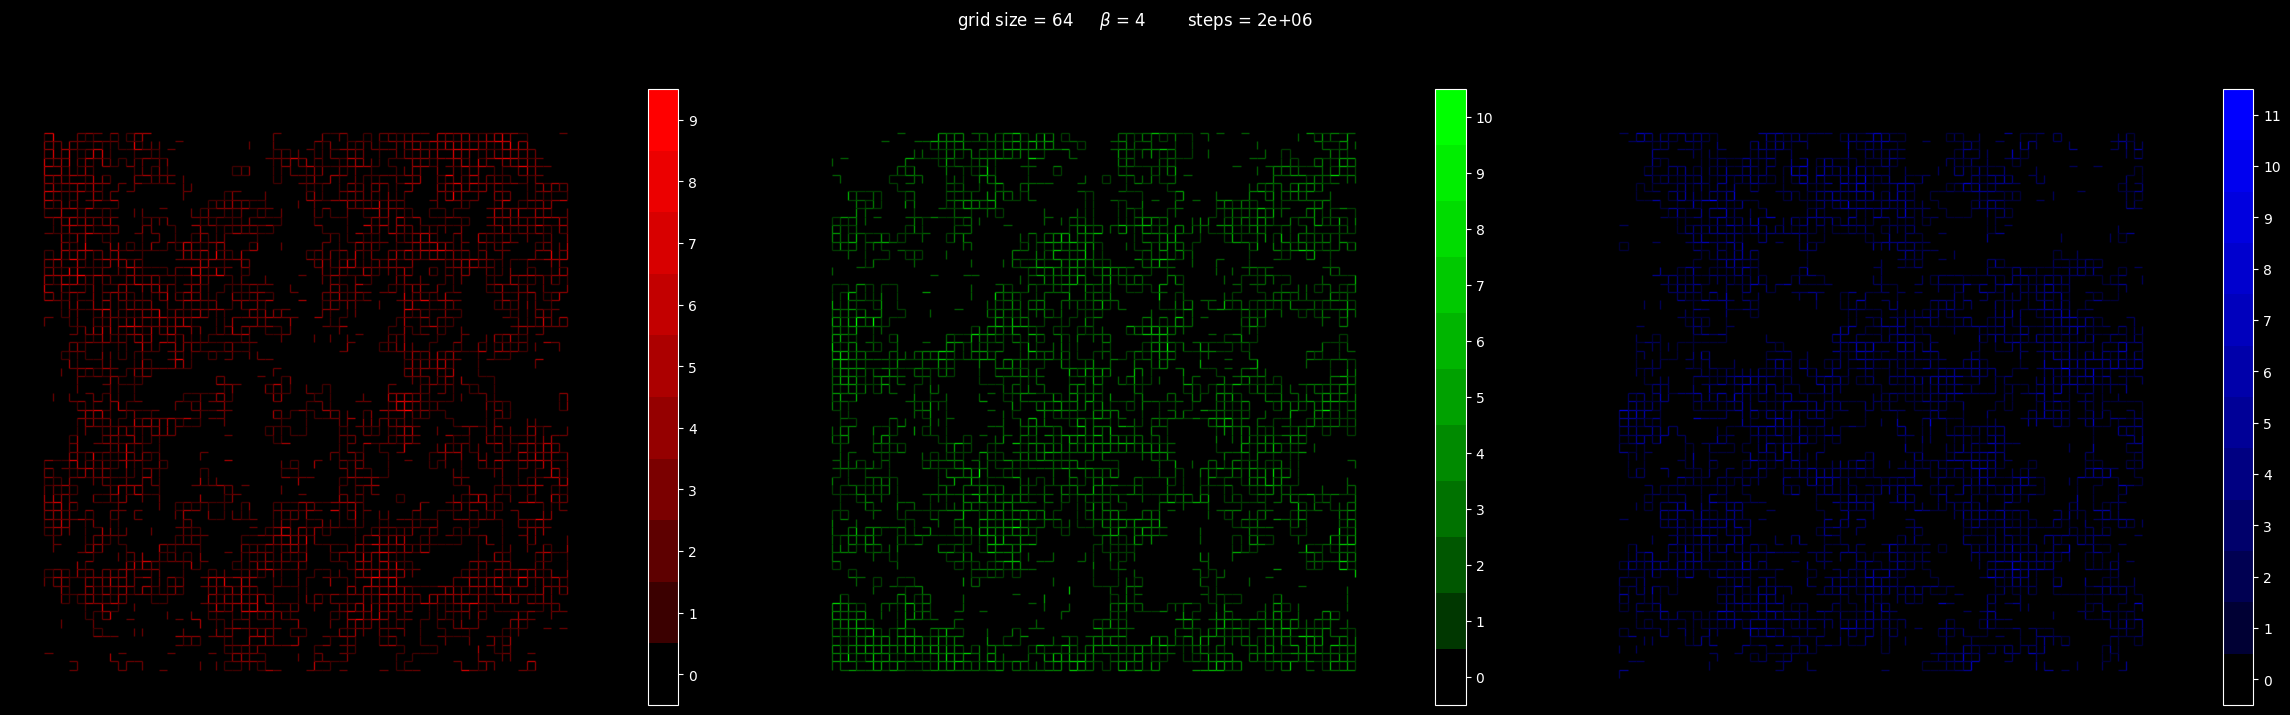

In [29]:
m.plot_grid()

In [42]:
def read_data(file_name):
    with open(file_name, 'r') as file:
        data_raw = json.load(file)

    data = {
        'percolation': np.array(data_raw['percolation'])
    }

    coords = {
        'grid_size': [32, 64, 96, 128] 
    }

    dims = {
        'percolation': ['grid_size']
    }

    idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
    summary = az.summary(idata)

    return summary['mean'], summary['mcse_mean']

In [39]:
with open(r'data\\percolation\\2_2024-04-09_14_14_50.json', 'r') as file:
    data_raw = json.load(file)


#data = {
#    'origin_loop_length': np.concatenate( [np.array(data_raw_1['origin_loop_length']), np.array(data_raw_2['origin_loop_length']), np.array(data_raw_3['origin_loop_length'])] )
#}

data = {
    'percolation': np.array(data_raw['percolation'])
}

coords = {
    'grid_size': [32, 64, 96, 128] 
}

dims = {
    'percolation': ['grid_size']
}

idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
summary = az.summary(idata)

perc_prob = summary['mean']
sigma = summary['mcse_mean']

for i in range(4):
    print(f'{perc_prob[i] =  } +/- {sigma[i]}')

perc_prob[i] =  0.112 +/- 0.032
perc_prob[i] =  0.021 +/- 0.007
perc_prob[i] =  0.0 +/- 0.0
perc_prob[i] =  0.0 +/- 0.0


C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Temp\ipykernel_9780\1752271906.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{perc_prob[i] =  } +/- {sigma[i]}')


In [40]:
with open(r'data\\percolation\\3_2024-04-09_15_27_27.json', 'r') as file:
    data_raw = json.load(file)


#data = {
#    'origin_loop_length': np.concatenate( [np.array(data_raw_1['origin_loop_length']), np.array(data_raw_2['origin_loop_length']), np.array(data_raw_3['origin_loop_length'])] )
#}

data = {
    'percolation': np.array(data_raw['percolation'])
}

coords = {
    'grid_size': [32, 64, 96, 128] 
}

dims = {
    'percolation': ['grid_size']
}

idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
summary = az.summary(idata)

perc_prob = summary['mean']
sigma = summary['mcse_mean']

for i in range(4):
    print(f'{perc_prob[i] =  } +/- {sigma[i]}')

perc_prob[i] =  0.354 +/- 0.051
perc_prob[i] =  0.394 +/- 0.054
perc_prob[i] =  0.424 +/- 0.049
perc_prob[i] =  0.347 +/- 0.046


C:\Users\lollo\AppData\Local\Temp\ipykernel_9780\1321802469.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{perc_prob[i] =  } +/- {sigma[i]}')


In [61]:
prob_2, sigma_2 = read_data('data\\percolation\\2_2024-04-09_14_14_50.json')
prob_3, sigma_3 = read_data('data\\percolation\\3_2024-04-09_15_27_27.json')
prob_4, sigma_4 = read_data('data\\percolation\\4_2024-04-09_16_41_55.json')
prob_5, sigma_5 = read_data('data\\percolation\\5_2024-04-09_17_45_40.json')

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


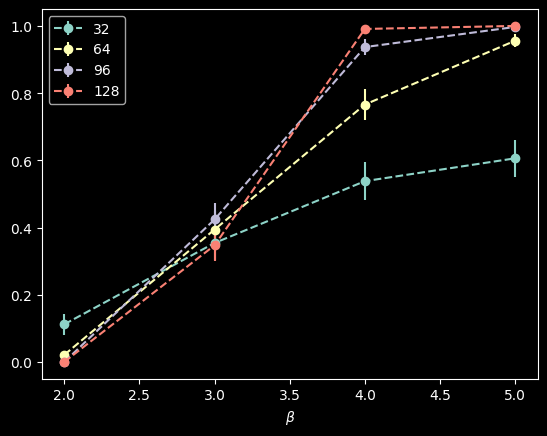

In [69]:
prob = np.array([prob_2, prob_3, prob_4, prob_5])
sigma = np.array([sigma_2, sigma_3, sigma_4, sigma_5])
betas = [2, 3, 4, 5]
grid_sizes = [32, 64, 96, 128]

for i in range(len(grid_sizes)):
    plt.errorbar(betas, prob.T[i], yerr=sigma.T[i], label=grid_sizes[i], linestyle='--', marker='o')

plt.xlabel(r'$\beta$')
plt.legend()

In [3]:
def read_perc_data(file_name):
    with open(file_name, 'r') as file:
        data_raw = json.load(file)

    data = {
        'percolation': np.array(data_raw['percolation'])
    }

    coords = {
        'betas': data_raw['params']['betas']
    }

    dims = {
        'percolation': ['beta']
    }

    idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
    summary = az.summary(idata)
    
    return summary['mean'], summary['mcse_mean']


In [5]:
perc_prob_32, sigma_32 = read_perc_data('data\\percolation\\32_2024-04-09_19_21_20.json')
perc_prob_64, sigma_64 = read_perc_data('data\\percolation\\64_2024-04-09_20_38_24.json')
per_prob_128, sigma_128 = read_perc_data('data\\percolation\\128_2024-04-10_02_55_26.json')

perc_probs = [perc_prob_32, perc_prob_64, per_prob_128] 
sigmas = [sigma_32, sigma_64, sigma_128]

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFou

Text(0.5, 0, '$\\beta$')

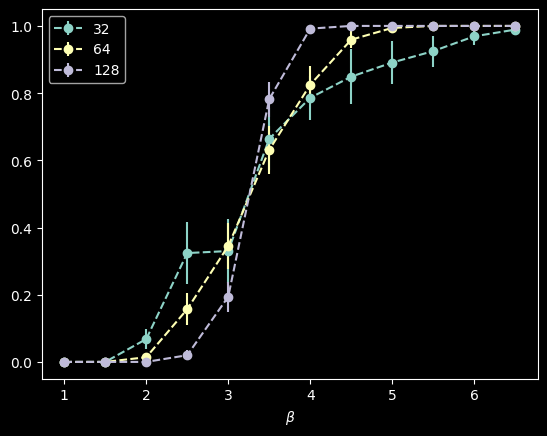

In [8]:
grid_sizes = [32, 64, 128]
for i in range(len(perc_probs)):
    plt.errorbar(np.arange(1, 7, 0.5), perc_probs[i], sigmas[i], linestyle='--', marker='o',label = grid_sizes[i])
plt.legend()
plt.xlabel(r'$\beta$')